# Análise de Mercado de Videogames 🎮

Este projeto analisa um conjunto de dados sobre vendas de videogames para identificar tendências, comportamentos de vendas e padrões no mercado de jogos eletrônicos. O dataset contém informações sobre vendas globais, plataformas, gêneros, publishers e avaliações de jogos lançados até 2016.



## Objetivos

- Identificar as plataformas mais populares e seu desempenho ao longo dos anos
- Analisar os gêneros de jogos mais vendidos globalmente
- Descobrir quais publishers dominam o mercado
- Investigar a relação entre avaliações de críticos/usuários e vendas
- Identificar tendências temporais no mercado de jogos

## 📁 Fonte dos Dados

- Dataset disponível no [Kaggle](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset)
- Período: até 2016
- Colunas principais: Nome, Plataforma, Ano, Gênero, Avaliações, Vendas globais e regionais.

## Importação de Bibliotecas

In [1]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações
import warnings
warnings.filterwarnings("ignore")

# Estilo dos gráficos
plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

## Análise Exploratória 

In [2]:
# Carregando o dataset
vgsales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
vgsales.name = "Video Game Sales"

# Visualização rápida
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Informações básicas
print("\n INFORMAÇÕES BÁSICAS:")
print(vgsales.info())


 INFORMAÇÕES BÁSICAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory us

In [4]:
# Estatísticas descritivas
print("\n ESTATÍSTICAS DESCRITIVAS:")
print(vgsales.describe(include='all').T)


 ESTATÍSTICAS DESCRITIVAS:
                   count unique                          top  freq  \
Name               16717  11562  Need for Speed: Most Wanted    12   
Platform           16719     31                          PS2  2161   
Year_of_Release  16450.0    NaN                          NaN   NaN   
Genre              16717     12                       Action  3370   
Publisher          16665    582              Electronic Arts  1356   
NA_Sales         16719.0    NaN                          NaN   NaN   
EU_Sales         16719.0    NaN                          NaN   NaN   
JP_Sales         16719.0    NaN                          NaN   NaN   
Other_Sales      16719.0    NaN                          NaN   NaN   
Global_Sales     16719.0    NaN                          NaN   NaN   
Critic_Score      8137.0    NaN                          NaN   NaN   
Critic_Count      8137.0    NaN                          NaN   NaN   
User_Score        7590.0    NaN                          NaN  

In [5]:
# Valores nulos
print("\n VALORES NULOS:")

print(vgsales.isnull().sum())
    


 VALORES NULOS:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
# Valores duplicados
print("\n VALORES DUPLICADOS:")
print(f"Total de duplicatas: {vgsales.duplicated().sum()}")


 VALORES DUPLICADOS:
Total de duplicatas: 0


## Limpeza de Dados 

In [7]:
# Função para limpeza de dados
def clean_data(vgsales):
    # Remover linhas duplicadas
    vgsales = vgsales.drop_duplicates()
    
    # Tratar anos futuros ou inválidos
    current_year = pd.Timestamp.now().year
    vgsales = vgsales[vgsales["Year_of_Release"] <= 2016]
    
    # Remover linhas com valores nulos em colunas importantes
    cols_to_check = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher']
    vgsales = vgsales.dropna(subset=cols_to_check)
    
    # Corrigir User_Score
    vgsales['User_Score'] = pd.to_numeric(vgsales['User_Score'].replace('tbd', np.nan), errors='coerce')
  
    
    # Preencher valores nulos em colunas numéricas com a mediana
    numeric_cols = ['Critic_Score', 'User_Score', 'NA_Sales', 'EU_Sales', 
                   'JP_Sales', 'Other_Sales', 'Global_Sales']
    for col in numeric_cols:
        if col in vgsales.columns:
            vgsales[col].fillna(vgsales[col].median(), inplace=True)
    
    return vgsales

In [8]:
# Aplicando a limpeza
vgsales_clean = clean_data(vgsales)

# Verificando o resultado
print("\nDados após limpeza:")
print(f"Linhas originais: {len(vgsales)}")
print(f"Linhas após limpeza: {len(vgsales_clean)}")
print(f"Percentual mantido: {len(vgsales_clean)/len(vgsales):.2%}")


Dados após limpeza:
Linhas originais: 16719
Linhas após limpeza: 16412
Percentual mantido: 98.16%


## Análise Temporal

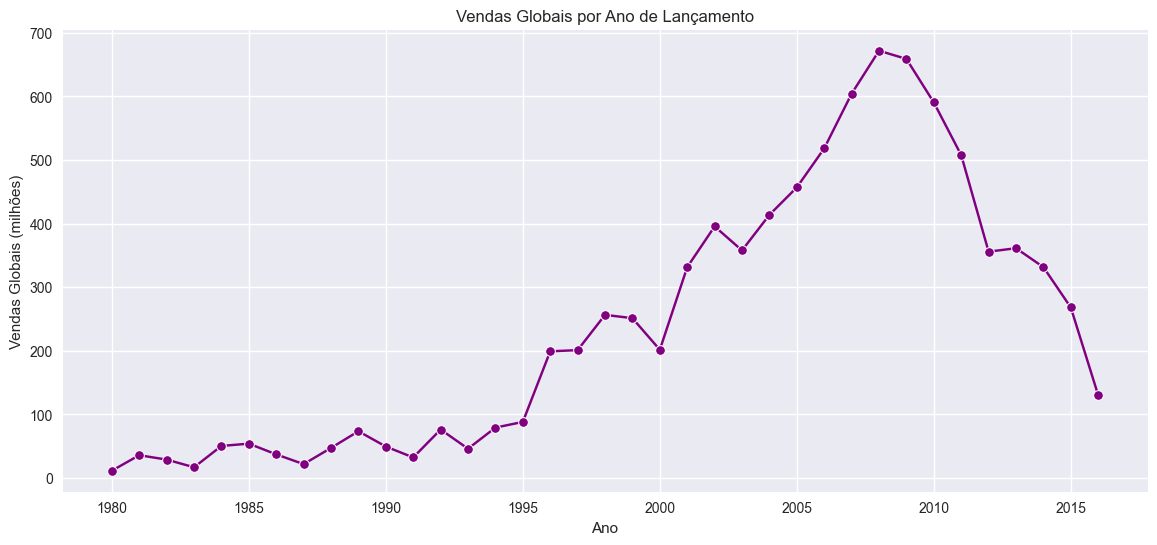

In [9]:
# Tendências temporais
plt.figure(figsize=(14, 6))
yearly_sales = vgsales_clean.groupby('Year_of_Release')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='purple')
plt.title("Vendas Globais por Ano de Lançamento")
plt.xlabel("Ano")
plt.ylabel("Vendas Globais (milhões)")
plt.show()

## Análise por Plataforma

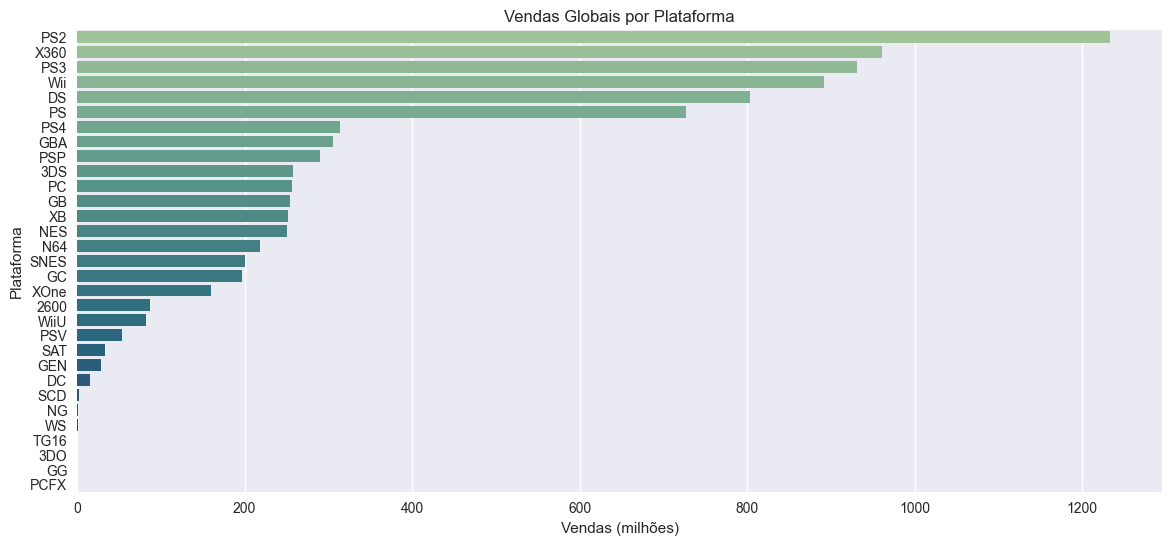

In [10]:
# Análise de vendas por plataforma

plt.figure(figsize=(14, 6))
platform_sales = vgsales_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette="crest")
plt.title("Vendas Globais por Plataforma")
plt.xlabel("Vendas (milhões)")
plt.ylabel("Plataforma")
plt.show()

top_platforms = platform_sales.head(5).index

In [11]:
# Top 5 plataformas
top_platforms = platform_sales.head(5).index
print("TOP5 PLATAFORMAS:", ", ".join(top_platforms))

TOP5 PLATAFORMAS: PS2, X360, PS3, Wii, DS


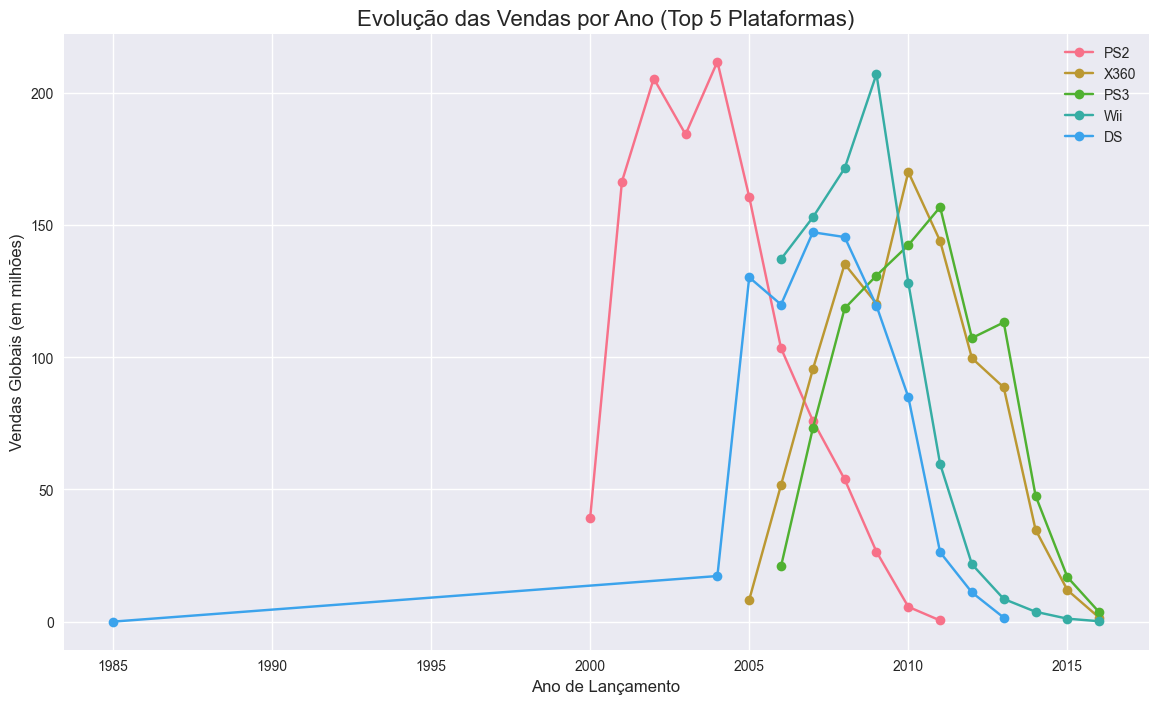

In [12]:
# Evolução temporal das top plataformas
plt.figure(figsize=(14, 8))
for platform in top_platforms:
    platform_data = vgsales_clean[vgsales_clean['Platform'] == platform]
    yearly_sales = platform_data.groupby('Year_of_Release')['Global_Sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform, marker='o')

plt.title('Evolução das Vendas por Ano (Top 5 Plataformas)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Análise por Gênero

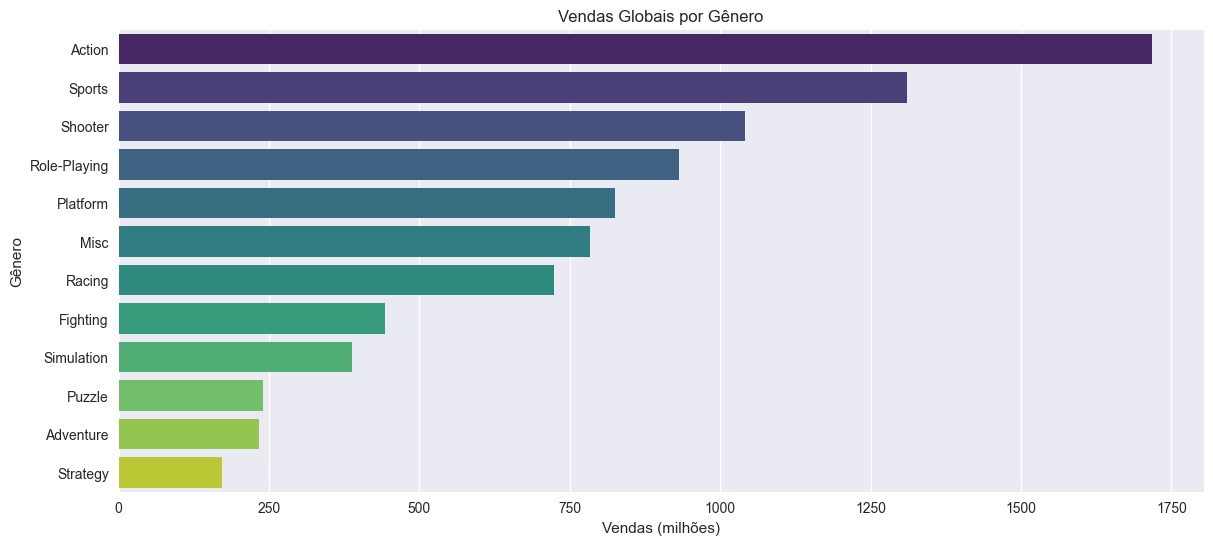

In [13]:
# Análise de vendas Globais por Gêneros

plt.figure(figsize=(14, 6))
genre_sales = vgsales_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")
plt.title("Vendas Globais por Gênero")
plt.xlabel("Vendas (milhões)")
plt.ylabel("Gênero")
plt.show()

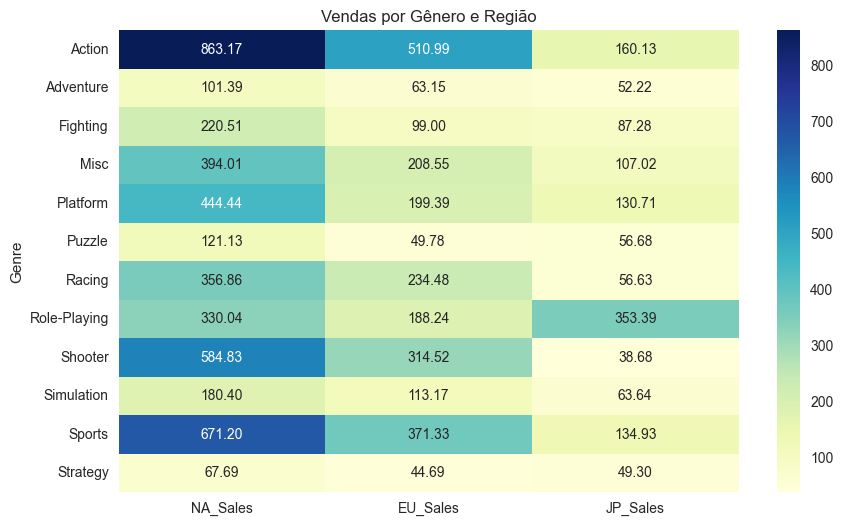

In [14]:
# Heatmap de vendas por região
genre_region_sales = vgsales_clean.groupby("Genre")[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_sales, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Vendas por Gênero e Região")
plt.show()

## Principais Jogos Vendidos

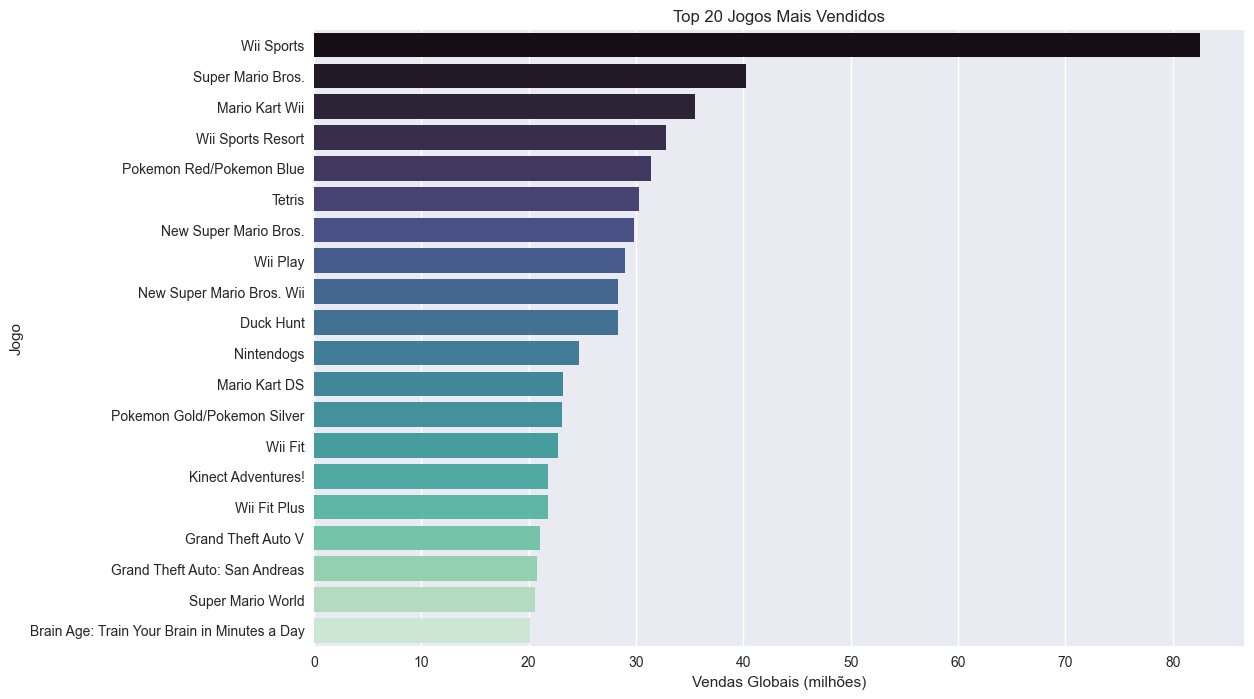

In [15]:
# Top 20 jogos mais vendidos
top_games = vgsales_clean.sort_values("Global_Sales", ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_games, x="Global_Sales", y="Name", palette="mako")
plt.title("Top 20 Jogos Mais Vendidos")
plt.xlabel("Vendas Globais (milhões)")
plt.ylabel("Jogo")
plt.show()

## Correlações entre Avaliações e Vendas 

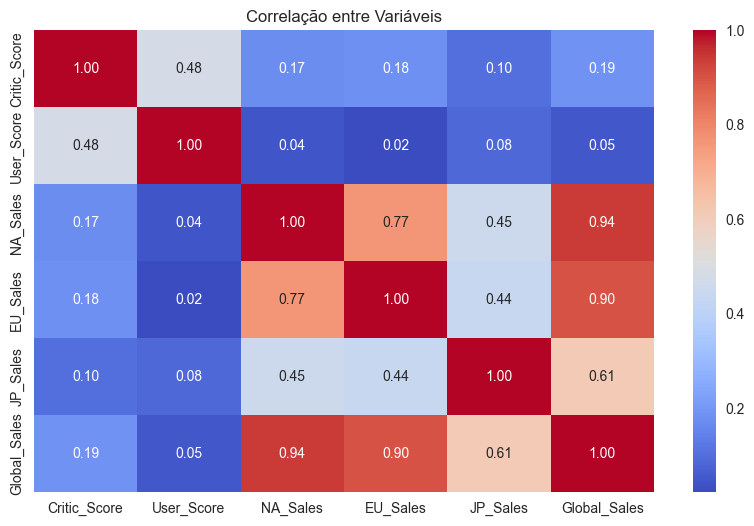

In [16]:
# Matriz de correlação
corr_cols = ['Critic_Score', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
corr_matrix = vgsales_clean[corr_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

## Avaliações por Plataforma

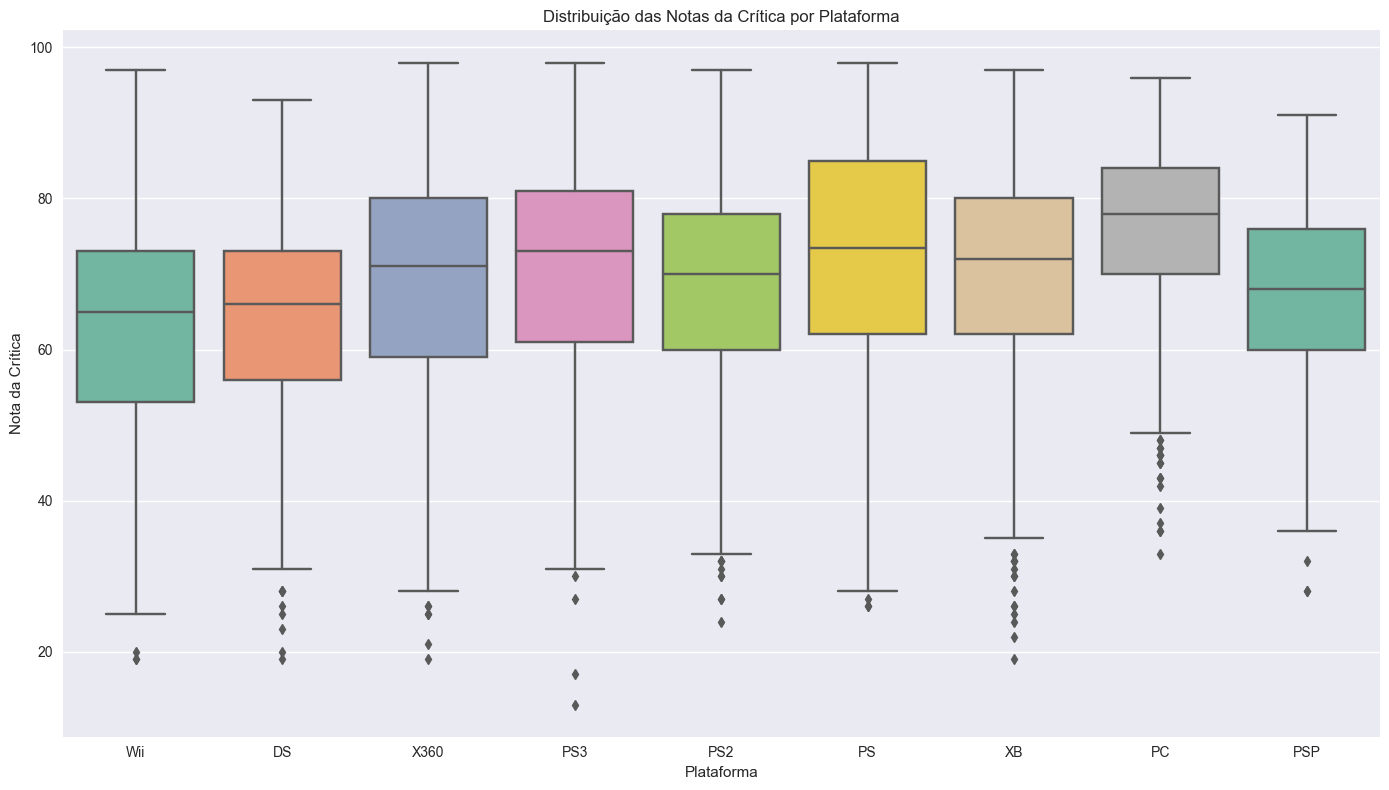

In [17]:
#Avaliações das notas por Plataforma

top_platforms = vgsales["Platform"].value_counts().head(9).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=vgsales[vgsales["Platform"].isin(top_platforms)], 
            x="Platform", y="Critic_Score", palette="Set2")
plt.title("Distribuição das Notas da Crítica por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Nota da Crítica")
plt.tight_layout()
plt.show()

## 📈 Insights 

- A plataforma **PS2** lidera em vendas históricas, indicando forte preferência por consoles da Sony durante os anos 2000, seguido por Xbox 360 e Nintendo.
- Gêneros como **Action**, **Sports** e **Shooter** dominam o volume de vendas globais de jo.
- As vendas na **América do Norte** representam uma fatia significativa, seguidas pela Europa. O Japão tem peso menor, mas com preferências distintas.
- Há uma **correlação positiva moderada** entre a avaliação crítica e as vendas, mas nem sempre os jogos mais bem avaliados são os mais vendidos.
- **Nintendo** aparece frequentemente entre as fornecedoras com mais sucesso com a plataforma, preferencialmente com o console **Wii**, mostrando consistência de marca e catálogo.



## ✅ Principais Conclusões

- O mercado de videogames é fortemente influenciado por plataformas dominantes em cada época.
- Gêneros populares tendem a se manter no topo ao longo dos anos, refletindo gostos estáveis do público.
- O sucesso de vendas nem sempre depende da avaliação crítica — há espaço para jogos com notas medianas se venderem bem, especialmente com forte marketing.
- Publicadoras com forte identidade de marca e franquias estabelecidas têm vantagem competitiva relevante.



## 🧩 Conclusão Final

A análise demonstrou que o mercado de videogames é altamente dinâmico e sensível tanto à inovação tecnológica quanto à reputação de produtos. Plataformas e gêneros passam por ciclos de sucesso, enquanto publishers estabelecidos mantêm domínio em várias frentes.